In [1]:
import math

## I. Exhaustive Search, Dichotomy and Golden Section

In [5]:
def frange(start, stop, step):
    # Range for float numbers
    while start < stop:
        yield start
        start += step

In [65]:
def func1(x):
    func1.counter +=1
    return pow(x, 3)

def func2(x):
    func2.counter +=1
    return abs(x-0.2)

def func3(x):
    func3.counter +=1
    if 0.01 <= x <= 1:
        return x*math.sin(1/x)
    else:
        print("x is not in range [0.1; 1]")
        return 0


In [67]:
# Exhaustive Search

a = 0.01
b = 1
eps = 0.001

fmin = 0
xmin = 0
iterations = 0
func3.counter = 0
for x in frange(a, b+eps, eps):
    current_f = func3(x)
    iterations +=1
    if x == a:
        fmin = current_f
        xmin = x
    if current_f < fmin:
        fmin = current_f
        xmin = x
print(func3.counter)
print(iterations)
print("Minimum f(x) =", fmin)
print("Minimum x =", xmin)

x is not in range [0.1; 1]
991
991
Minimum f(x) = -0.2172246125808345
Minimum x = 0.22300000000000017


In [68]:
# Dichotomy (bisection method)
def dichotomy(f, a, b, eps, c=1):
    # c = 1, (min F(x))
    # c = -1, (max F(x))
    iterations = 0
    while True:
        iterations += 1
        x = (a + b) / 2
        f1 = f(x - eps)
        f2 = f(x + eps)
        
        if (c * f1) < (c * f2):
            b = x
        else:
            a = x
        if (b - a) < eps:
            break
    x = (b + a) / 2
    fmin = f(x)
    print("x=", x)
    print("fmin=", fmin)
    print("iterations =", iterations)
    return


a = 0
b = 1
eps = 0.001
iterations = 0
dichotomy(func3, 0.01, b, eps)

x= 0.22221191406250002
fmin= -0.2172286118926715
iterations = 10


In [57]:
# Golden Section
def goldenSection(f, a, b, eps, phi=(3-math.sqrt(5))/2, psi=(math.sqrt(5)-1)/2):
    iterations = 0
    x1 = a + phi*(b - a)
    x2 = a + psi*(b - a)
    fx1 = f(x1)
    fx2 = f(x2)

    while(abs(a-b) > eps and abs(a-b) > eps*abs(a+b)/2):
        iterations +=1
        if fx1 < fx2:
            b = x2
            x2 = x1
            fx2 = fx1
            x1 = a + psi*(x2 - a)
            fx1 = f(x1)
        else:
            a = x1
            x1 = x2
            fx1 = fx2
            x2 = b - psi*(b - x1)
            fx2 = f(x2)

    print("iterations =", iterations)
    return (x1 + x2) / 2


a = 0
b = 1
eps = 0.001 
goldenSection(func2, 0, b, eps)

iterations = 15


0.20007331374358572

## II. Multidimensional Methods of exhaustive search, Gauss (coordinate descent), Nelder-Mead) in the tasks of unconstrained nonlinear optimization

In [14]:
import random
import numpy
import scipy

In [ ]:
alfa, beta = random.random(), random.random()
x, y = [], []

for k in range(0, 100+1):
    x_k = k/100
    y_k = alfa*x_k + beta + numpy.random.normal(0, 1)
    x.append(x_k)
    y.append(y_k)

print("x[:10]:", x[:10])
print("y[:10]:", y[:10])

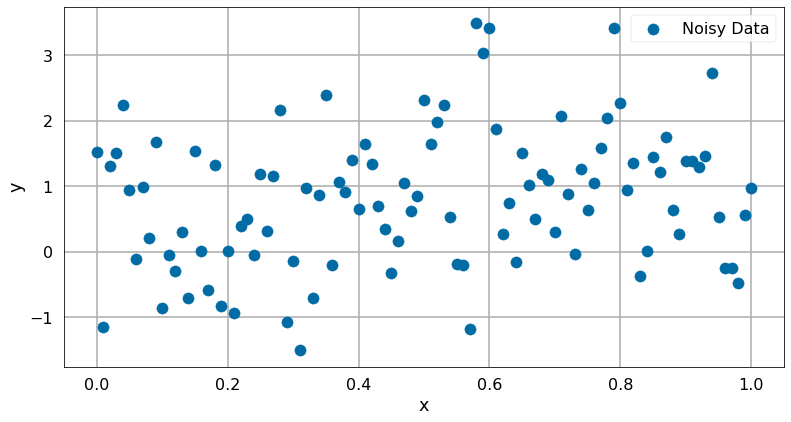

In [30]:
from cProfile import label
from cmath import log
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([1, 1, 1, 1])
ax.set_ylabel('y')
ax.set_xlabel('x')

ax1 = ax.scatter(x, y, label="Noisy Data")
# ax2 = ax.plot(x_approx, y_approx, label="Linear approximant")
ax.legend(loc='upper right')

plt.show()